0. iteration: 
a =
[0.36224801 0.21592799 0.01038313]
b =
[0.316 2.602 0.1   0.946 1.342 1.558 0.1   0.478 2.152 1.522 0.802 0.1
 0.1   0.1   0.1   0.1   0.1   0.1   0.37  0.1  ]
1. iteration: 
a =
[ 0.36007422  0.28100749 -0.02756424]
b =
[0.45867207 2.602      0.1        0.946      1.342      1.558
 0.23681359 0.64187734 2.152      1.522      0.802      0.1
 0.1        0.1        0.78151792 0.1        0.47355714 0.79795739
 1.00426913 0.1       ]
2. iteration: 
a =
[ 0.37834223  0.31232513 -0.0501783 ]
b =
[0.45867207 2.602      0.1        0.946      1.50944509 1.558
 0.23681359 0.64187734 2.152      1.522      0.802      0.1
 0.1        0.1        0.85906036 0.11300176 1.00040343 0.95602889
 1.20748484 0.1       ]
3. iteration: 
a =
[ 0.35823154  0.32944902 -0.0576671 ]
b =
[0.45867207 2.602      0.1        0.946      1.52552071 1.558
 0.23681359 0.64187734 2.152      1.522      0.802      0.1
 0.1        0.1        1.07918271 0.2936109  1.00040343 1.16621155
 1.36465431 0.1       ]

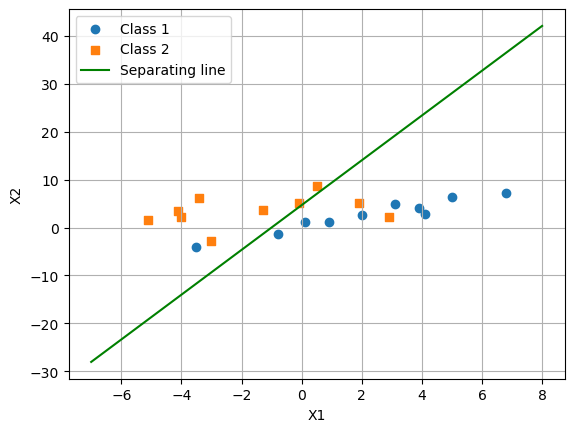

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class_1_samples = [
    (0.1, 1.1), 
    (6.8, 7.1), 
    (-3.5, -4.1), 
    (2.0, 2.7), 
    (4.1, 2.8), 
    (3.1, 5.0), 
    (-0.8, -1.3), 
    (0.9, 1.2),
    (5.0, 6.4),
    (3.9, 4.0)
]

class_2_samples = [
    (-3.0, -2.9), 
    (0.5, 8.7),
    (2.9, 2.1),
    (-0.1, 5.2),
    (-4.0, 2.2),
    (-1.3, 3.7),
    (-3.4, 6.2),
    (-4.1, 3.4),
    (-5.1, 1.6),
    (1.9, 5.1)
]

labeled_class_1_samples = [(1,) + sample for sample in class_1_samples]
labeled_class_2_samples = [(-1,) + (-sample[0], -sample[1]) for sample in class_2_samples]
combined_samples = labeled_class_1_samples + labeled_class_2_samples

# convert to numpy array
Y = np.array(combined_samples)

# initialize parameter
a = np.full((3,), 0.1)
b = np.full((len(combined_samples),), 0.1)  # b for every # of sample
learning_rate = 0.9 
epochs = 200 

# check convergence
def has_converged(Ya, threshold=0.01):
    return np.all(Ya > 0) and np.min(Ya) < threshold

# plot
def plot_samples_and_hyperplane(Y, a, class_1_samples, class_2_samples):
    plt.scatter(*zip(*class_1_samples), marker='o', label='Class 1')
    plt.scatter(*zip(*class_2_samples), marker='s', label='Class 2')
    
    # x range for plotting the line
    x_range = np.linspace(-7, 8, 100)
    # y from the line equation
    y_range = -(a[1]/a[2])*x_range - (a[0]/a[2])
    
    # for drawing
    plt.plot(x_range, y_range, 'g-', label='Separating line')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.show()

# ho-kashyap 
for i in range(epochs):
    
    e = np.dot(Y, a) - b
    Ya = np.dot(Y, a)
    
    if has_converged(Ya):
        print(f"converged at iteration {i}")
        break
    
    b = b + learning_rate * (e + np.abs(e))
    result = Y.T @ Y
    
    try:
        inverse_result = np.linalg.inv(result)
        a = (inverse_result @ Y.T) @ b
        
    # spesific error module for library
    except np.linalg.LinAlgError:
        print("matrix is singular")
        break
    
    print(f"{i}. iteration: \na =\n{a}\nb =\n{b}")

print("final a:", a)
print("final b:", b)

plot_samples_and_hyperplane(Y, a, class_1_samples, class_2_samples)
